<a href="https://colab.research.google.com/github/Rebe1Coding/bigData/blob/main/%D0%9A%D0%B0%D0%BB%D0%BE%D1%80%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/Rebe1Coding/kaggle_competitions.git

Cloning into 'kaggle_competitions'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 12 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 11.69 MiB | 13.07 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
cd kaggle_competitions/Predict Calorie Expenditure/

/content/kaggle_competitions/Predict Calorie Expenditure


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
import seaborn as sns


In [7]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_y = pd.read_csv('sample_submission.csv')

In [8]:
df.tail()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0
749999,749999,female,39,171.0,65.0,19.0,97.0,40.6,103.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [10]:
df.isna().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [11]:
encoder = LabelEncoder()

df['Sex']= encoder.fit_transform(df['Sex'])

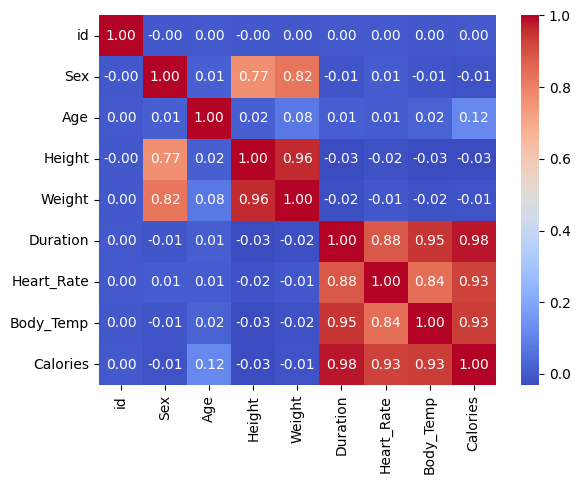

In [12]:
corr_matrix = df.corr(method='spearman')

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<Axes: >

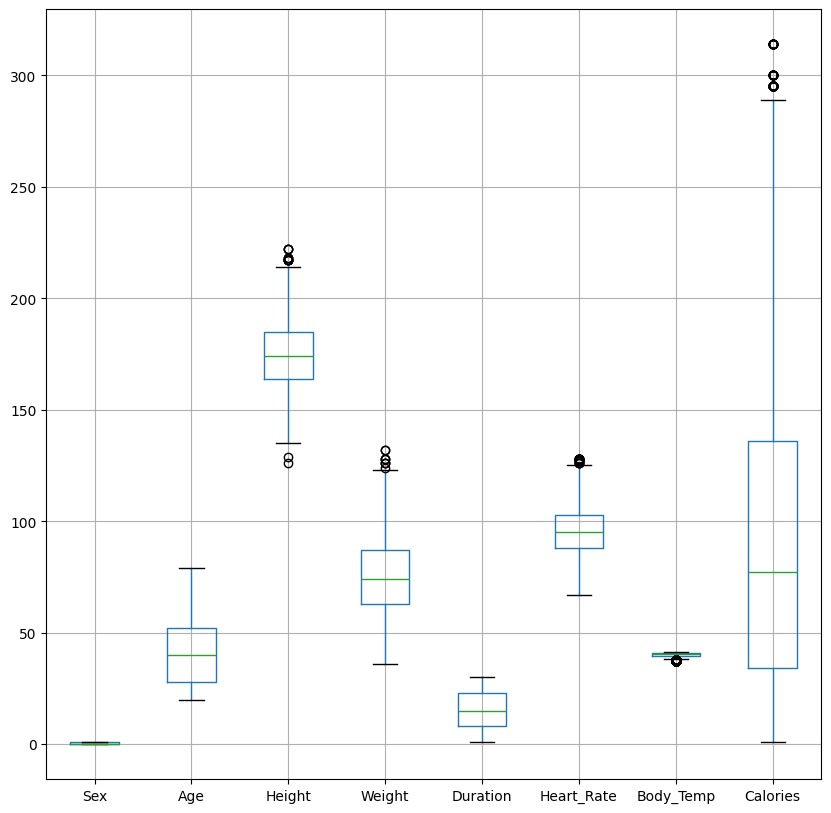

In [13]:
df.drop(['id'],axis=1) .boxplot(figsize=(10,10))

Найдено 9 пар с корреляцией > 0.5


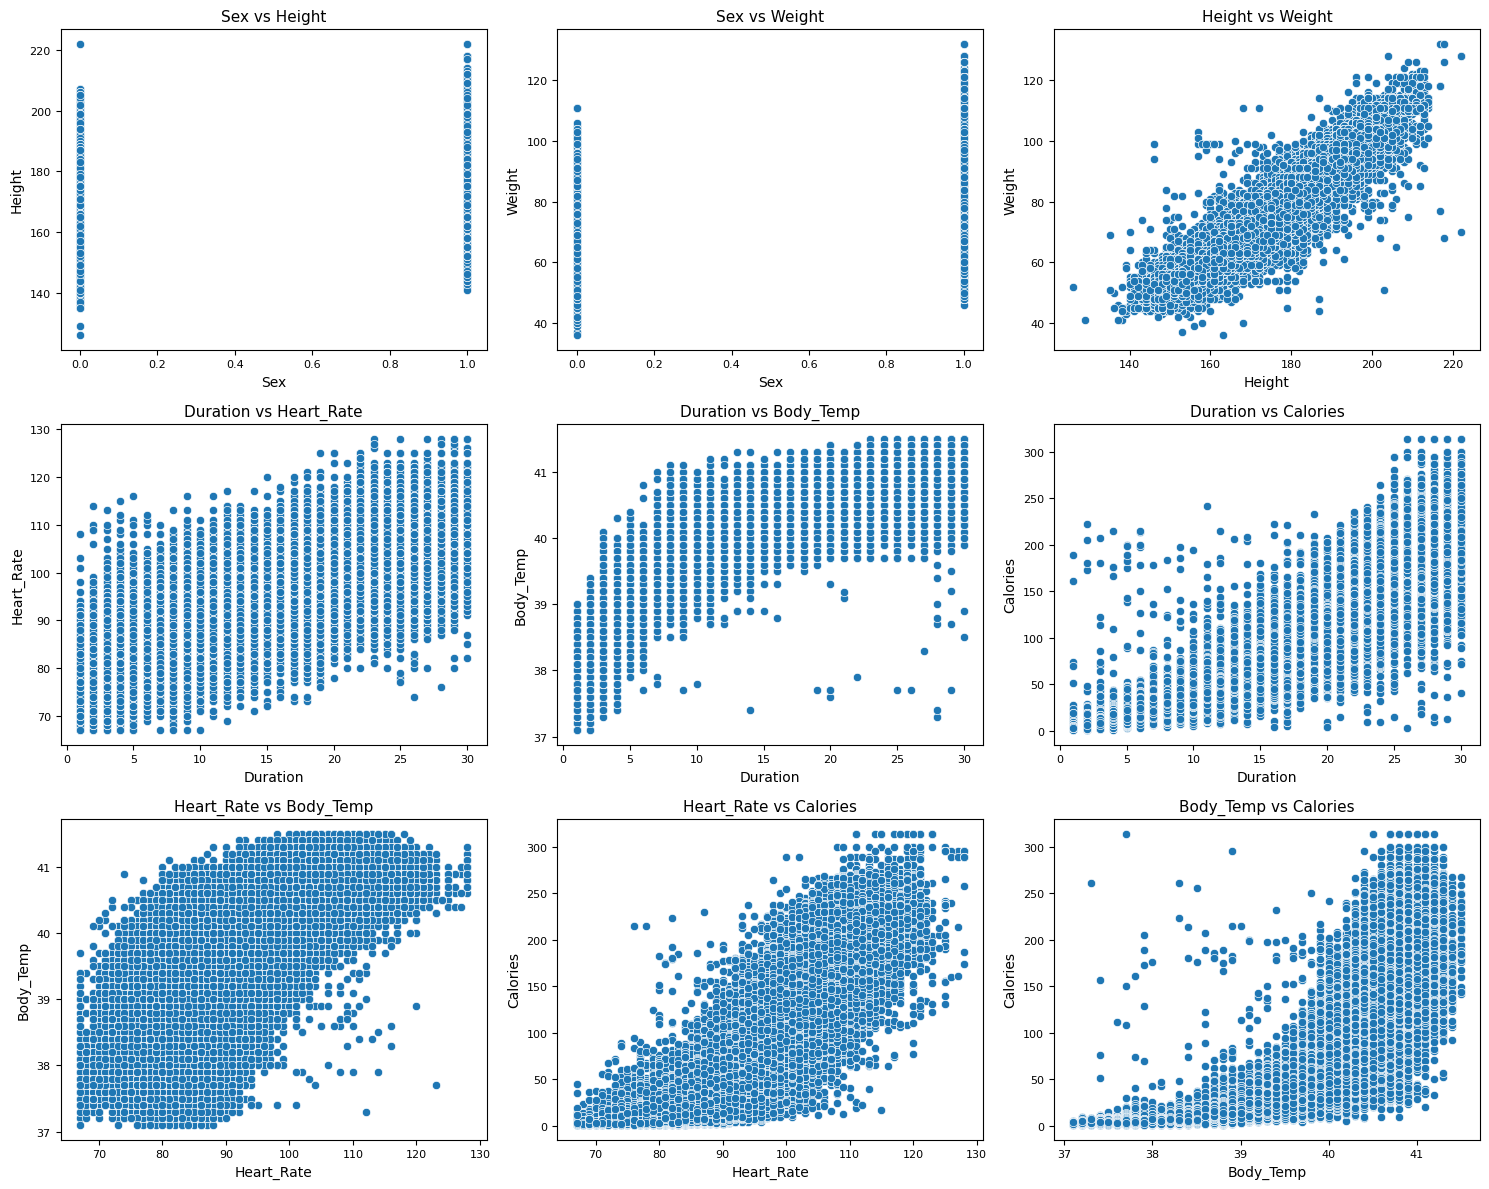

In [15]:
def plot_highly_correlated_pairs(df=df, threshold=0.5):
    # Посчитаем корреляцию
    corr_matrix = df.corr(numeric_only=True)

    # Найдём пары признаков с высокой корреляцией (по модулю)
    corr_pairs = []
    cols = corr_matrix.columns

    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold and abs(corr_value) < 1:
                corr_pairs.append((cols[i], cols[j]))

    print(f'Найдено {len(corr_pairs)} пар с корреляцией > {threshold}')

    # Визуализация
    cols_plot = 3
    rows_plot = math.ceil(len(corr_pairs) / cols_plot)
    fig, axes = plt.subplots(rows_plot, cols_plot, figsize=(5 * cols_plot, 4 * rows_plot))
    axes = axes.flatten()

    for i, (col1, col2) in enumerate(corr_pairs):
        sns.scatterplot(x=df[col1], y=df[col2], ax=axes[i])
        axes[i].set_title(f'{col1} vs {col2}', fontsize=11)
        axes[i].tick_params(labelsize=8)

    # Удалим лишние оси
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_highly_correlated_pairs()

<Axes: xlabel='count', ylabel='Heart_Rate'>

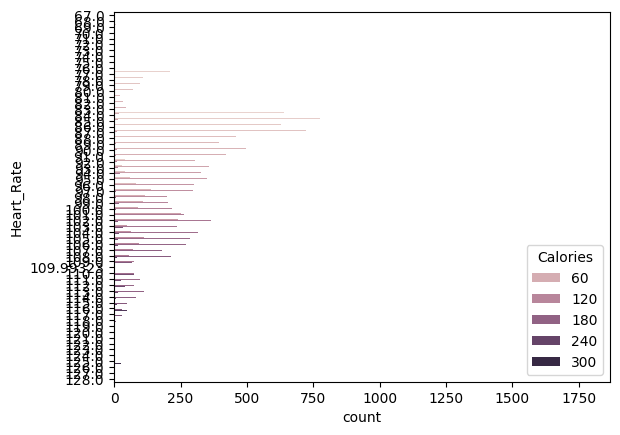

In [16]:
sns.countplot(y='Heart_Rate',hue='Calories', data=df)

In [18]:
test_df = pd.merge(df_test, df_y, on='id')
test_df['Sex']= encoder.fit_transform(test_df['Sex'])

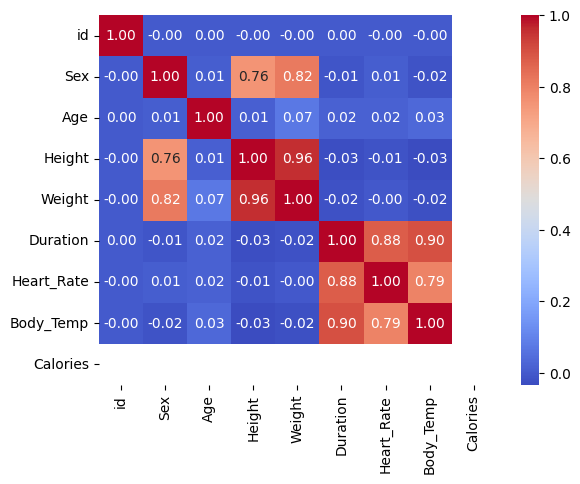

In [20]:
test_matrix_corr = test_df.corr(method='pearson')

plt.figure()
sns.heatmap(test_matrix_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [29]:
df['BMI']=df['Weight']/ (df['Height']/100)**2

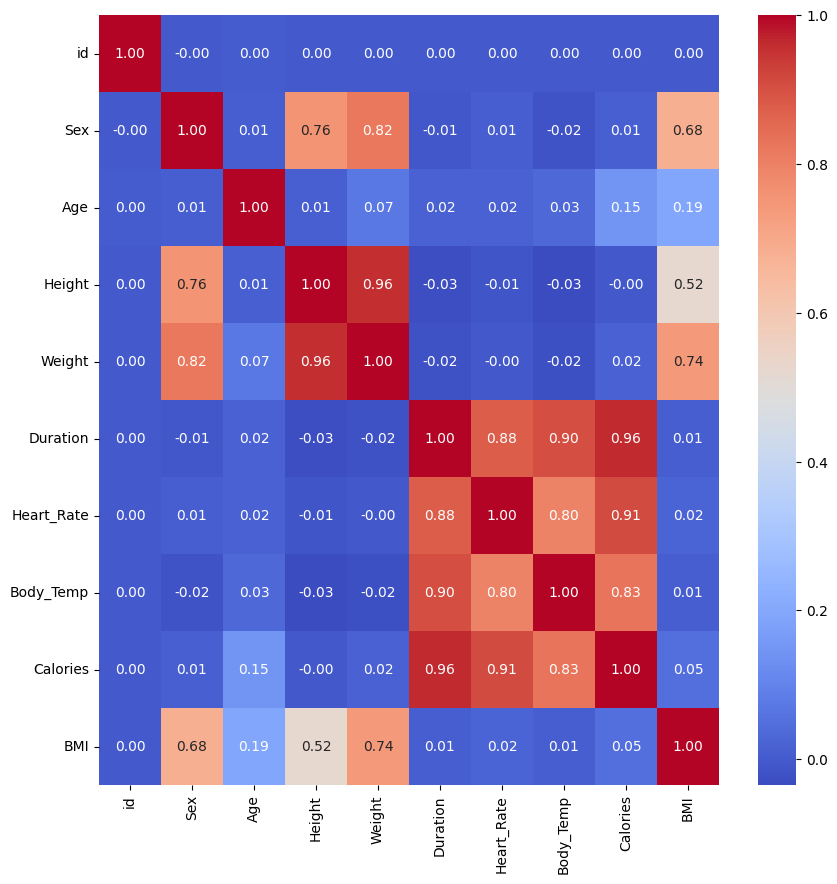

In [24]:
matrix_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()